In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [2]:
conn = utils.db_connect()

2023-07-23 18:20:04,981 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-07-23 18:20:04,982 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-07-23 18:20:05,142 INFO sqlalchemy.engine.Engine select current_schema()
2023-07-23 18:20:05,143 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-07-23 18:20:05,304 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-07-23 18:20:05,304 INFO sqlalchemy.engine.Engine [raw sql] {}


In [6]:
rounds = pd.read_sql("select * from gold.rounds", conn)

2023-07-23 18:21:02,300 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2023-07-23 18:21:02,301 INFO sqlalchemy.engine.Engine [cached since 37.32s ago] {'name': 'select * from gold.rounds'}
2023-07-23 18:21:02,381 INFO sqlalchemy.engine.Engine select * from gold.rounds
2023-07-23 18:21:02,382 INFO sqlalchemy.engine.Engine [raw sql] {}


array([[<AxesSubplot:title={'center':'sg_putt'}>,
        <AxesSubplot:title={'center':'sg_arg'}>],
       [<AxesSubplot:title={'center':'sg_app'}>,
        <AxesSubplot:title={'center':'sg_off_tee'}>],
       [<AxesSubplot:title={'center':'sg_t2g'}>,
        <AxesSubplot:title={'center':'sg_total'}>]], dtype=object)

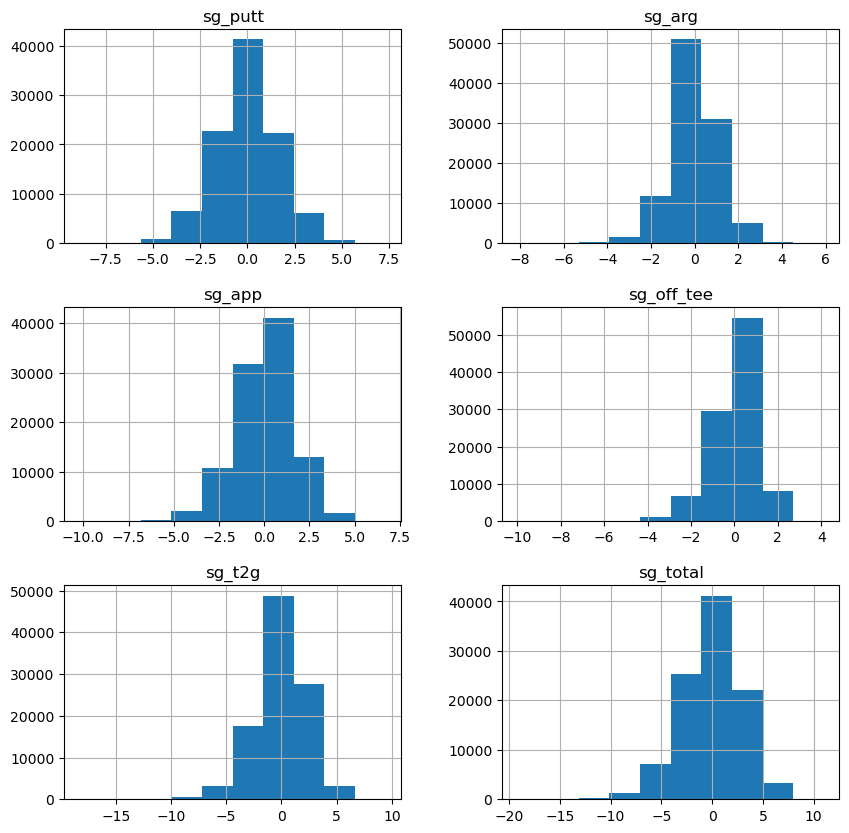

In [7]:
# distribution of strokes gained columns
rounds[['sg_putt', 'sg_arg', 'sg_app', 'sg_off_tee', 'sg_t2g', 'sg_total']].hist(figsize=(10,10))

In [21]:
rounds.describe().T

,count,mean,std,min,25%,50%,75%,max
year,192634.0,2019.819616,1.945737,2017.000,2018.00000,2020.000,2022.00000,2.023000e+03
season,192634.0,2019.937861,1.958923,2017.000,2018.00000,2020.000,2022.00000,2.023000e+03
event_id,192634.0,152.062377,185.964199,2.000,22.00000,60.000,143.00000,5.410000e+02
course_num,192634.0,496.721456,336.134537,4.000,63.00000,654.000,771.00000,2.000000e+03
course_par,192634.0,71.184542,0.791400,70.000,71.00000,71.000,72.00000,7.300000e+01
dg_id,192634.0,15431.450393,72326.796406,24.000,10943.00000,14776.000,18631.00000,1.005830e+07
round_num,192634.0,2.186888,1.071041,1.000,1.00000,2.000,3.00000,4.000000e+00
start_hole,192634.0,2.714915,4.040608,0.000,0.00000,1.000,1.00000,1.000000e+01
round_score,192634.0,70.515407,4.795676,0.000,68.00000,70.000,73.00000,9.500000e+01
sg_putt,100785.0,0.000365,1.651092,-8.884,-1.04500,0.000,1.05900,7.321000e+00


array([[<AxesSubplot:title={'center':'driving_acc'}>,
        <AxesSubplot:title={'center':'driving_dist'}>],
       [<AxesSubplot:title={'center':'gir'}>,
        <AxesSubplot:title={'center':'scrambling'}>],
       [<AxesSubplot:title={'center':'round_score'}>, <AxesSubplot:>]],
      dtype=object)

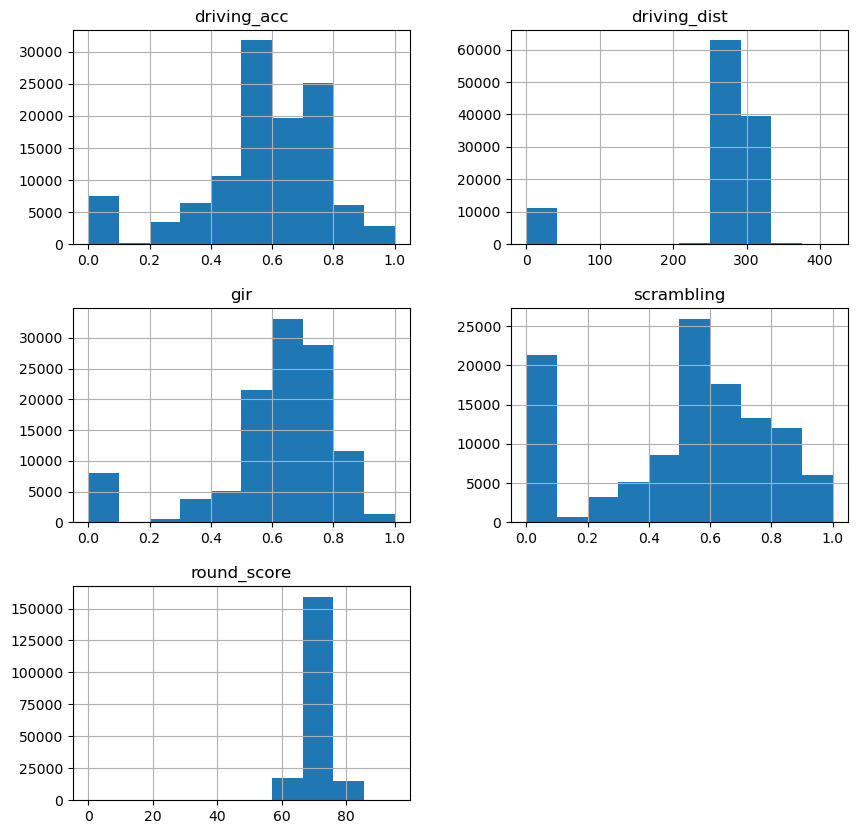

In [8]:
rounds[['driving_acc', 'driving_dist', 'gir', 'scrambling', 'round_score']].hist(figsize=(10,10))

In [10]:
conn.close()

In [11]:
# rounds where gir and driving distance are 0
rounds[(rounds['gir'] == 0) & (rounds['driving_dist'] == 0)]

,tour,year,season,event_id,event_name,course_name,course_num,course_par,dg_id,player_name,...,driving_acc,driving_dist,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,has_traditional_stats,has_sg
8453,pga,2023,2023,18,Zurich Classic of New Orleans,TPC Louisiana,714,72,19872,"Riley, Davis",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
8454,pga,2023,2023,18,Zurich Classic of New Orleans,TPC Louisiana,714,72,19872,"Riley, Davis",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
8455,pga,2023,2023,18,Zurich Classic of New Orleans,TPC Louisiana,714,72,19872,"Riley, Davis",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
8456,pga,2023,2023,18,Zurich Classic of New Orleans,TPC Louisiana,714,72,19872,"Riley, Davis",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
8457,pga,2023,2023,18,Zurich Classic of New Orleans,TPC Louisiana,714,72,19865,"Hardy, Nick",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191671,pga,2017,2017,2,CareerBuilder Challenge,Nicklaus Tournament Course,233,72,15162,"Drewitt, Brett",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
191674,pga,2017,2017,2,CareerBuilder Challenge,La Quinta CC,202,72,6462,"Bohn, Jason",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
191675,pga,2017,2017,2,CareerBuilder Challenge,Nicklaus Tournament Course,233,72,6462,"Bohn, Jason",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
191676,pga,2017,2017,2,CareerBuilder Challenge,Nicklaus Tournament Course,233,72,15318,"Loupe, Andrew",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [ ]:
# aggregate strokes gained by player and season, including count of rounds
df_rounds_agg = df_rounds.groupby(['dg_id', 'season']).agg({'sg_off_tee': 'mean', 'sg_putt': 'mean', 'sg_arg': 'mean', 'sg_app': 'mean', 'sg_t2g':'mean', 'sg_total': 'mean'}).reset_index()

In [13]:
rounds_sg = rounds[rounds['has_sg']==True]

In [14]:
rounds_sg.head().T

,0,1,2,3,4
tour,pga,pga,pga,pga,pga
year,2023,2023,2023,2023,2023
season,2023,2023,2023,2023,2023
event_id,30,30,30,30,30
event_name,John Deere Classic,John Deere Classic,John Deere Classic,John Deere Classic,John Deere Classic
course_name,TPC Deere Run,TPC Deere Run,TPC Deere Run,TPC Deere Run,TPC Deere Run
course_num,669,669,669,669,669
course_par,71,71,71,71,71
dg_id,17511,17511,17511,17511,12425
player_name,"Straka, Sepp","Straka, Sepp","Straka, Sepp","Straka, Sepp","Todd, Brendon"


In [16]:
events_sg = rounds_sg.groupby(['tour', 'season', 'event_id', 'dg_id']).agg(
    {'sg_putt': 'sum', 'sg_arg': 'sum', 'sg_app': 'sum', 'sg_off_tee': 'sum', 'sg_t2g':'sum', 'sg_total': 'sum',
     'course_par':'sum', 'round_num':'max', 'round_score':'sum'}
    ).reset_index()

In [17]:
events_sg['final_score'] = events_sg['round_score'] - events_sg['course_par']

In [19]:
events_sg.head()

,tour,season,event_id,dg_id,sg_putt,sg_arg,sg_app,sg_off_tee,sg_t2g,sg_total,course_par,round_num,round_score,final_score
0,pga,2017,3,493,-3.008,0.057,-1.347,2.565,1.276,-1.733,284,4,282,-2
1,pga,2017,3,1547,4.480,0.367,3.061,-1.643,1.785,6.267,284,4,274,-10
2,pga,2017,3,1804,-0.847,1.258,0.642,-3.000,-1.099,-1.946,142,2,143,1
3,pga,2017,3,4107,-0.093,0.501,0.781,-2.136,-0.853,-0.946,142,2,142,0
4,pga,2017,3,4163,0.975,-0.078,-1.105,-0.738,-1.921,-0.946,142,2,142,0


In [18]:
# correlation matrix
events_sg.corr()['final_score']


season        -0.103089
event_id       0.019310
dg_id         -0.023716
sg_putt       -0.186374
sg_arg        -0.133147
sg_app        -0.208324
sg_off_tee    -0.160215
sg_t2g        -0.275367
sg_total      -0.333254
course_par    -0.237999
round_num     -0.233306
round_score    0.009753
final_score    1.000000
Name: final_score, dtype: float64

In [ ]:
events_sg = rounds_sg.groupby(['tour', 'season', 'event_id', 'dg_id']).agg(
    {'sg_putt': 'sum', 'sg_arg': 'sum', 'sg_app': 'sum', 'sg_off_tee': 'sum', 'sg_t2g':'sum', 'sg_total': 'sum',
     'course_par':'sum', 'round_num':'max', 'round_score':'sum'}
    ).reset_index()